# Assignment 
1. Upload your [yourname]dataset.npz to whatsapp group
2. Vary the parameters from splitting data into trainImage and testImage to find the best accuracy
3. Predict and display your prediction 

In [201]:
import tensorflow as tf 
print(tf.__version__)

2.7.0


In [202]:
import numpy as np 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [203]:
datasetFileName = "azureen_dataset.npz"
with np.load(datasetFileName, allow_pickle=True) as data:
    dataImages = data['images']
    dataLabels = data['labels']
    dataLabelNames = data['labelnames']

In [204]:
print(dataImages.shape)
print(dataLabels.shape)
print(dataLabelNames.shape)

(59,)
(59,)
(59,)


In [205]:
print(dataImages.dtype)
print(dataLabels.dtype)
print(dataLabelNames.dtype)

object
int64
<U10


In [206]:
print(dataLabels)
print(dataLabelNames)

[0 1 3 5 6 7 8 0 1 2 3 4 5 6 7 8 0 1 3 4 6 7 1 2 3 6 7 0 1 3 4 6 7 1 2 3 6
 7 8 2 3 6 7 8 0 1 3 4 7 1 3 5 6 8 1 2 3 6 7]
['afiq' 'azureen' 'goke' 'jincheng' 'mahmuda' 'numan' 'saseendran' 'afiq'
 'azureen' 'gavin' 'goke' 'inamul' 'jincheng' 'mahmuda' 'numan'
 'saseendran' 'afiq' 'azureen' 'goke' 'inamul' 'mahmuda' 'numan' 'azureen'
 'gavin' 'goke' 'mahmuda' 'numan' 'afiq' 'azureen' 'goke' 'inamul'
 'mahmuda' 'numan' 'azureen' 'gavin' 'goke' 'mahmuda' 'numan' 'saseendran'
 'gavin' 'goke' 'mahmuda' 'numan' 'saseendran' 'afiq' 'azureen' 'goke'
 'inamul' 'numan' 'azureen' 'goke' 'jincheng' 'mahmuda' 'saseendran'
 'azureen' 'gavin' 'goke' 'mahmuda' 'numan']


In [207]:
classNames = sorted(np.unique(dataLabelNames))
print(classNames)

['afiq', 'azureen', 'gavin', 'goke', 'inamul', 'jincheng', 'mahmuda', 'numan', 'saseendran']


In [208]:
# model expect shape of image to be 300,300

import cv2 as cv 

#desiredShape = (300,300,3)

N = len(dataImages)
shape = (N, 300, 300, 3)
y = np.empty(shape)

for i in range(N):
    y[i] = cv.resize(dataImages[i], [300,300], interpolation=cv.INTER_AREA)


dataImages.dtype, y.dtype, y.shape

dataImages = y

In [209]:
dataImages.dtype

dtype('float64')

In [210]:
dataImages.shape

(59, 300, 300, 3)

In [211]:
len(dataImages)

59

In [212]:
dataImages.astype('float32')
print(dataImages.dtype)

float64


In [213]:
dataImages = np.float32(dataImages)


In [214]:
dataImages.dtype

dtype('float32')

In [215]:
import cv2 as cv 
import matplotlib.pyplot as plt 

# file path
# imgPath = 'final2.png'
shape = (N, 300, 300)
imgGray = np.empty(shape)

for i in range(N):

    # Convert to grayscale 
    imgGray[i] = cv.cvtColor(dataImages[i], cv.COLOR_BGR2GRAY)
    
 

dataImages = imgGray 

 

In [216]:
dataImages.dtype

dtype('float64')

In [217]:
dataImages.dtype


dtype('float64')

In [218]:
dataImages = np.float32(dataImages)


In [219]:
dataImages.dtype

dtype('float32')

In [220]:
dataImages.shape

(59, 300, 300)

In [221]:
len(dataImages)

59

In [222]:
imgGray.shape

(59, 300, 300)

In [223]:
len(imgGray)

59

In [224]:
dataLabels = dataLabels.astype('uint8')
dataLabels.dtype

dtype('uint8')

In [225]:
# Split the data 
trainImages, testImages, trainLabels, testLabels = train_test_split(dataImages, dataLabels, test_size=0.33, random_state=40)
print(trainImages.shape)
print(testImages.shape)

(39, 300, 300)
(20, 300, 300)


In [226]:
print(testLabels.shape)
print(trainLabels.shape)

(20,)
(39,)


In [227]:
testLabels

array([6, 1, 6, 7, 3, 3, 6, 7, 3, 8, 8, 0, 7, 7, 0, 7, 3, 6, 3, 4],
      dtype=uint8)

In [228]:
inputShape = trainImages[0].shape
outputShape = len(classNames)

inputShape, outputShape

((300, 300), 9)

In [229]:
# Normalize
trainImages = trainImages / 255.0
testImages = testImages / 255.0


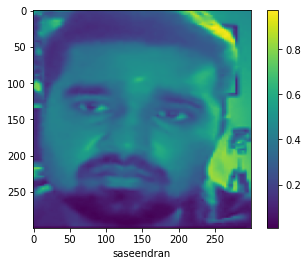

In [230]:
# Visualize train image data 


plt.figure()
plt.imshow(trainImages[0])
plt.xlabel(classNames[trainLabels[0]])
plt.colorbar()
plt.grid(False)
plt.show()

In [231]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = inputShape),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    # tf.keras.layers.Softmax()
    tf.keras.layers.Dense(outputShape)

])
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_16 (Flatten)        (None, 90000)             0         
                                                                 
 dense_96 (Dense)            (None, 128)               11520128  
                                                                 
 dense_97 (Dense)            (None, 128)               16512     
                                                                 
 dense_98 (Dense)            (None, 128)               16512     
                                                                 
 dense_99 (Dense)            (None, 128)               16512     
                                                                 
 dense_100 (Dense)           (None, 128)               16512     
                                                                 
 dense_101 (Dense)           (None, 9)               

In [232]:
model.compile(optimizer='adam', 
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics = ['accuracy'])

In [233]:
trainLabels

array([8, 6, 2, 2, 6, 3, 7, 6, 2, 3, 1, 2, 5, 1, 5, 1, 4, 1, 7, 8, 4, 1,
       0, 7, 2, 6, 1, 3, 6, 4, 1, 3, 5, 1, 3, 7, 0, 0, 8], dtype=uint8)

In [234]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.99):
            print("\nReached 99% accuracy so cancelling training!")
            self.model.stop_training = True

In [235]:
model.fit(trainImages, trainLabels, epochs=40, callbacks=[myCallback()])

Epoch 1/40
2/2 [==============================] - 1s 23ms/step - loss: 3.9992 - accuracy: 0.1795
Epoch 2/40
2/2 [==============================] - 0s 25ms/step - loss: 13.9585 - accuracy: 0.0769
Epoch 3/40
2/2 [==============================] - 0s 23ms/step - loss: 8.4954 - accuracy: 0.1282
Epoch 4/40
2/2 [==============================] - 0s 23ms/step - loss: 4.8886 - accuracy: 0.1282
Epoch 5/40
2/2 [==============================] - 0s 23ms/step - loss: 4.5054 - accuracy: 0.1795
Epoch 6/40
2/2 [==============================] - 0s 23ms/step - loss: 3.5814 - accuracy: 0.2564
Epoch 7/40
2/2 [==============================] - 0s 26ms/step - loss: 2.0097 - accuracy: 0.2821
Epoch 8/40
2/2 [==============================] - 0s 23ms/step - loss: 1.9451 - accuracy: 0.3846
Epoch 9/40
2/2 [==============================] - 0s 23ms/step - loss: 1.8934 - accuracy: 0.3590
Epoch 10/40
2/2 [==============================] - 0s 23ms/step - loss: 1.2114 - accuracy: 0.4872
Epoch 11/40
2/2 [===========

In [236]:
testLoss, testAcc = model.evaluate(testImages, testLabels, verbose=2)
print('Test Acc:', testAcc)

1/1 - 0s - loss: 1.3345 - accuracy: 0.8000 - 121ms/epoch - 121ms/step
Test Acc: 0.800000011920929


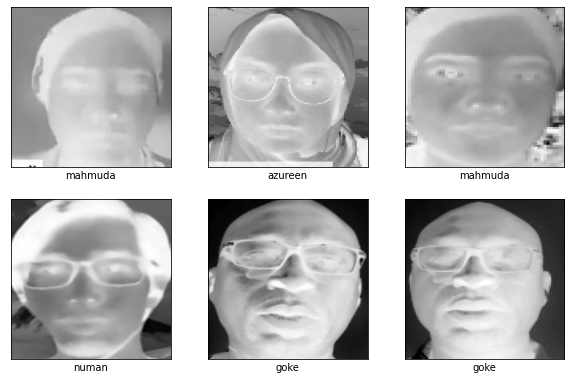

In [237]:
plt.figure(figsize=(10,10))

for i in range(6):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(testImages[i], cmap=plt.cm.binary)
    plt.xlabel(classNames[testLabels[i]])

plt.show()

### SOftmax

Softmax layers assits in turning the predictions values to fractions. Showing the highest values as the most likely

In [238]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [239]:
predictions = probability_model.predict(testImages)

In [240]:
predictions[0]


array([1.1766717e-04, 1.8854441e-02, 1.2716982e-01, 2.2499138e-01,
       1.9989449e-05, 1.4372064e-03, 6.2355173e-01, 8.1306580e-04,
       3.0446136e-03], dtype=float32)

In [241]:
for v in predictions[0]:

    print(f'{v:.2f}', end=', ')

0.00, 0.02, 0.13, 0.22, 0.00, 0.00, 0.62, 0.00, 0.00, 

In [242]:
np.argmax(predictions[0]), testLabels[0]

(6, 6)

In [243]:
np.sum(predictions[0])

0.9999999

### Saving Model

In [244]:
import os 

exportPath = ""

# if testAcc >0.95:
modelDir = 'tf_model1'
version = f"4_{(testAcc*100):.0f}"

# for SavedModel format 
exportPath = os.path.join(modelDir, version)

# save the model
model.save(exportPath, save_format="tf")

print('\nexport path = {}'.format(exportPath))

!dir {exportPath}

INFO:tensorflow:Assets written to: tf_model1/4_80/assets

export path = tf_model1/4_80
zsh:1: command not found: dir


## Load Model

In [248]:
# load SavedModel format

exportPath = '/Users/azureennaja/Desktop/Perantis/cv-master/azuPrj/json_c/tf_model1/4_30'
newModel = tf.keras.models.load_model(exportPath)

# Check its archi
newModel.summary()

OSError: No file or directory found at /Users/azureennaja/Desktop/Perantis/cv-master/azuPrj/json_c/tf_model1/4_30

In [ ]:
# Evaluate 

loss, acc = newModel.evaluate(testImages, testLabels, verbose=2)
print('Restored Model, Accuracy: {:5.2f}%'.format(100 * acc))

newPredictions = newModel.predict(testImages)

print(newPredictions.shape)

newPredictions[0]

ValueError: in user code:

    File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/keras/engine/training.py", line 1366, in test_function  *
        return step_function(self, iterator)
    File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/keras/engine/training.py", line 1356, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/keras/engine/training.py", line 1349, in run_step  **
        outputs = model.test_step(data)
    File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/keras/engine/training.py", line 1303, in test_step
        y_pred = self(x, training=False)
    File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/keras/engine/input_spec.py", line 247, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_12" (type Sequential).
    
    Input 0 of layer "dense_32" is incompatible with the layer: expected axis -1of input shape to have value 270000, but received input with shape (None, 90000)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None, 300, 300), dtype=float32)
      • training=False
      • mask=None


In [ ]:
print("predictions: ", np.argmax(newPredictions[0]))
print("actual:", testLabels[0])

NameError: name 'newPredictions' is not defined

## Simulations of MOdels

In [ ]:
### Simulation for Models 

maxIterations = 15
testAccList = []
thresholdAcc = 0.95
lastTestAcc = 0.0

model = None 
testLoss = 0.0
testAcc = 0.0
modelDir = 'tf_model'
epoch = 20

for iter in range(maxIterations):

    print(f'simulation {iter + 1}', end = '... ')

    model = tf.keras.Sequential([
        # tf.keras.layers.Flatten(input_shape = (28,28)),
        tf.keras.layers.Flatten(input_shape = inputShape),
        tf.keras.layers.Dense(128, activation= 'relu'),
        tf.keras.layers.Dense(128, activation= 'relu'),
        tf.keras.layers.Dense(128, activation= 'relu'),
        tf.keras.layers.Dense(128, activation= 'relu'),
        tf.keras.layers.Dense(128, activation= 'relu'),
        #tf.keras.layers.Dense(128, activation= 'relu'),
        tf.keras.layers.Dense(outputShape)
    ])
    # model.summary()

    model.compile(optimizer='adam',
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(
                      from_logits = True),
                  metrics = ['accuracy'])
    
    # model training
    model.fit(trainImages, trainLabels, epochs=epoch, verbose=0)

    # model testing
    testLoss, testAcc = model.evaluate(testImages, testLabels, verbose=0)

    # store the accuracy
    testAccList.append(testAcc)

    #print('\nTest Accuracy:', testAcc)
    print(f'test accuracy {testAcc}', end='...')

    exportPath = ""

    # save model if greater than threshold-accuracy 0.95
    if testAcc > thresholdAcc:
        #SavedMdeol formt
        version = f'4_{(testAcc*100):.0f}'

        # for SavedModel format
        exportPath = os.path.join(modelDir, version)

        #save the model
        model.save(exportPath, save_format='tf')
        # print(f'\nexport path = {exportPath}')

        print(f'export path = {exportPath}', end='')


        # #HDF% format 
        # exportPath = os.path.join(modelDir, f"{version}.h5")
        # #Save the entire model to HDF5 file 
        # # THe '.h5' extension indicates that the model should be saved to HDF5
        # model.save(exportPath)
        # print('saved:', exportPath)

        thresholdAcc = testAcc
        
    print('.')


simulation 1... test accuracy 0.6000000238418579....
simulation 2... test accuracy 0.6000000238418579....
simulation 3... test accuracy 0.6000000238418579....
simulation 4... WARNING:tensorflow:5 out of the last 5 calls to <function Model.make_test_function.<locals>.test_function at 0x7fba09941160> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
test accuracy 0.6000000238418579....
simulation 5... WARNING:tensorflow:6 out of the last 6 cal

# Example 

Simulate until a threshold accuracy value is obtained else 1000 max iteration

In [ ]:
### Simulation for Models 

maxIterations = 10
testAccList = []
thresholdAcc = 0.95
lastTestAcc = 0.0

model = None 
testLoss = 0.0
testAcc = 0.0
modelDir = 'tf_model'
epoch = 30

for iter in range(maxIterations):

    print(f'simulation {iter + 1}', end = '... ')

    model = tf.keras.Sequential([
        # tf.keras.layers.Flatten(input_shape = (28,28)),
        tf.keras.layers.Flatten(input_shape = inputShape),
        tf.keras.layers.Dense(128, activation= 'relu'),
        tf.keras.layers.Dense(128, activation= 'relu'),
       # tf.keras.layers.Dense(128, activation= 'relu'),
        #tf.keras.layers.Dense(128, activation= 'relu'),
        #tf.keras.layers.Dense(128, activation= 'relu'),
       # tf.keras.layers.Dense(128, activation= 'relu'),
        tf.keras.layers.Dense(outputShape)
    ])
    # model.summary()

    model.compile(optimizer='adam',
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(
                      from_logits = True),
                  metrics = ['accuracy'])
    
    # model training
    model.fit(trainImages, trainLabels, epochs=epoch, verbose=0)

    # model testing
    testLoss, testAcc = model.evaluate(testImages, testLabels, verbose=0)

    # store the accuracy
    testAccList.append(testAcc)

    #print('\nTest Accuracy:', testAcc)
    print(f'test accuracy {testAcc}', end='...')

    exportPath = ""

    # save model if greater than threshold-accuracy 0.95
    if testAcc > thresholdAcc:
        #SavedMdeol formt
        version = f'4_{(testAcc*100):.0f}'

        # for SavedModel format
        exportPath = os.path.join(modelDir, version)

        #save the model
        model.save(exportPath, save_format='tf')
        # print(f'\nexport path = {exportPath}')

        print(f'export path = {exportPath}', end='')


        # #HDF% format 
        # exportPath = os.path.join(modelDir, f"{version}.h5")
        # #Save the entire model to HDF5 file 
        # # THe '.h5' extension indicates that the model should be saved to HDF5
        # model.save(exportPath)
        # print('saved:', exportPath)

        thresholdAcc = testAcc
        
    print('.')


simulation 1... test accuracy 0.6499999761581421....
simulation 2... test accuracy 0.6000000238418579....
simulation 3... test accuracy 0.699999988079071....
simulation 4... test accuracy 0.699999988079071....
simulation 5... test accuracy 0.75....
simulation 6... test accuracy 0.8500000238418579....
simulation 7... test accuracy 0.699999988079071....
simulation 8... test accuracy 0.699999988079071....
simulation 9... test accuracy 0.75....
simulation 10... test accuracy 0.6000000238418579....


In [ ]:
dataLabels = dataLabels.astype('uint8')
dataLabels.dtype

dtype('uint8')

## Assignment 

1. Convert the dataset images to grayscale before training and testing 
Hint: Remember that the input shape will change 
- resize first and change to grayscale


# 1 hour workout
Send your images (already cut) to email: gokeladokun@gmail.com

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'yellow'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(classNames[predicted_label],
                                100*np.max(predictions_array),
                                classNames[true_label]),
                                color=color)

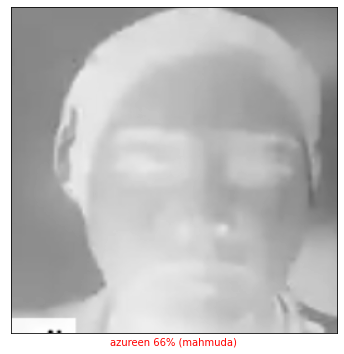

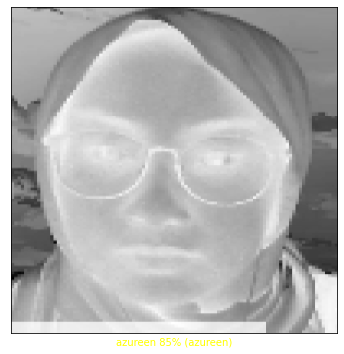

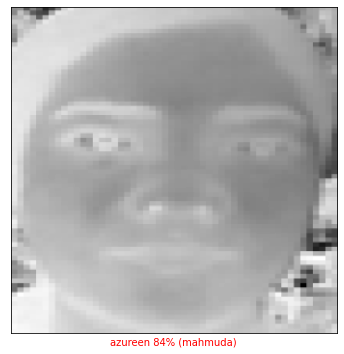

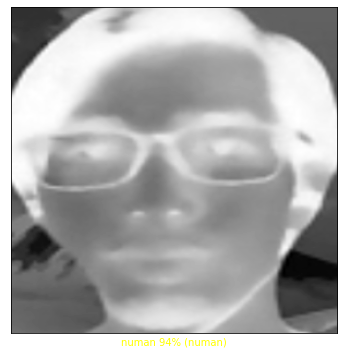

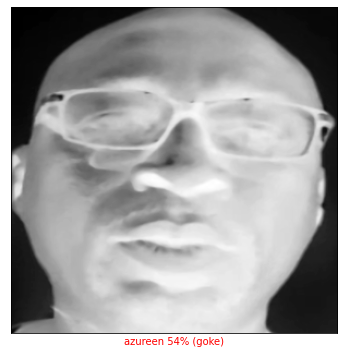

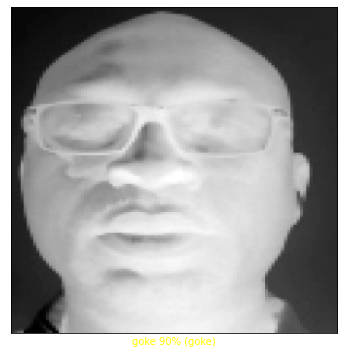

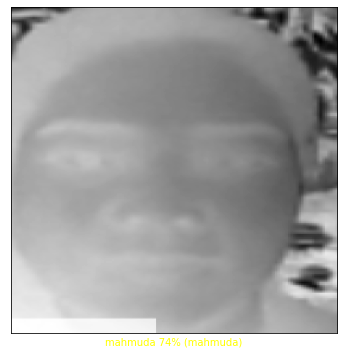

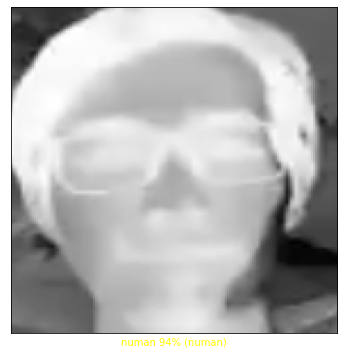

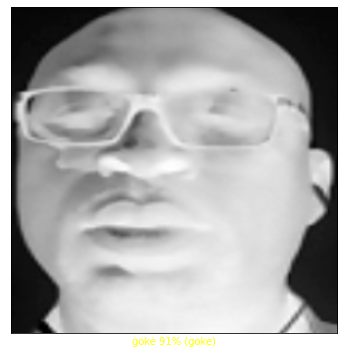

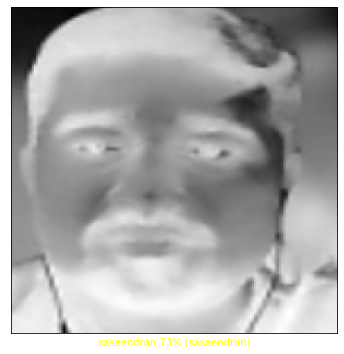

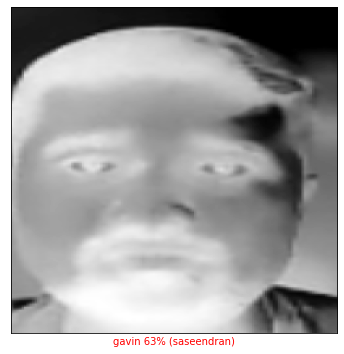

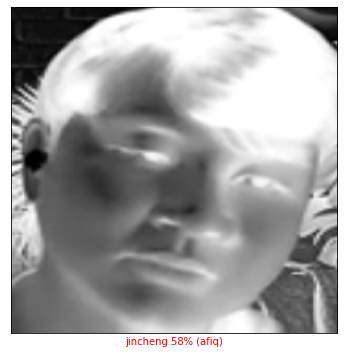

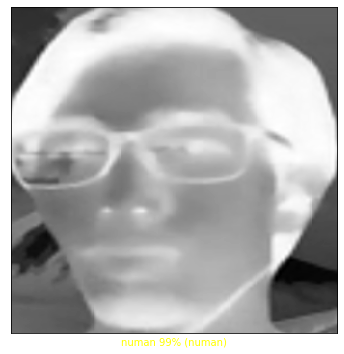

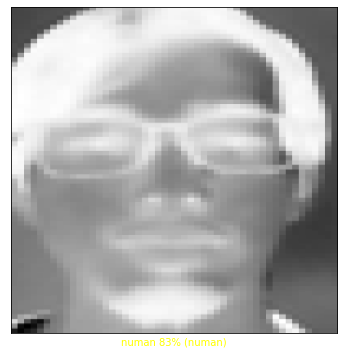

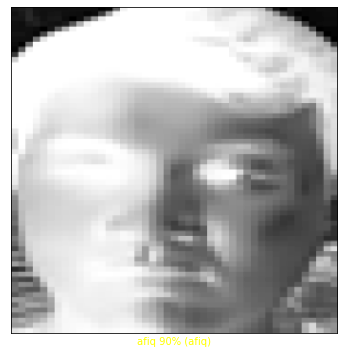

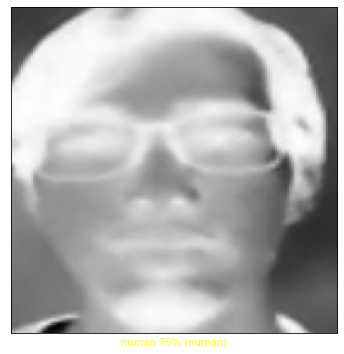

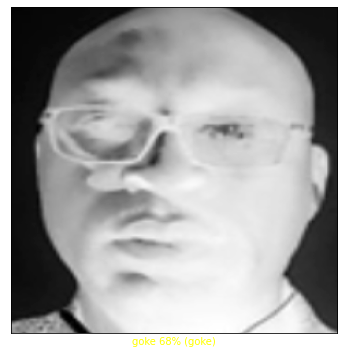

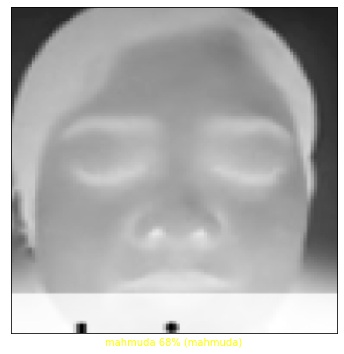

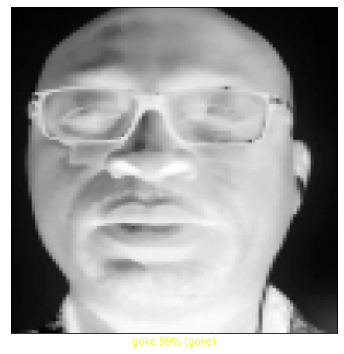

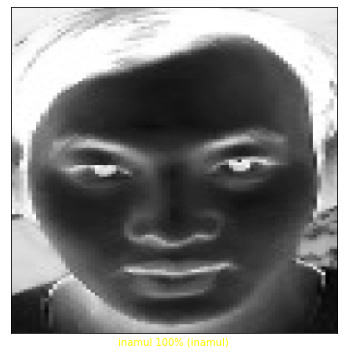

In [ ]:
for i in range (len(predictions)):
    plt.figure(figsize=(6,6))
    plot_image(i, predictions[i], testLabels, testImages)


plt.show()